Forecasting Timeseries Data Using Facebook FbProphet
Steps Required With FbProphet

Introduction And Installation
Data Preprocessing With Time Seires
Model Fitting
Obtaining The Forecasts
Plotting The Forecasts
Cross Validation
Computing Performance Metrics
Visualize the Performance MEtrics
Conclusions

In [1]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [3]:
df.drop(168,axis=0,inplace=True)

In [4]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [5]:
df.columns=["ds","y"]

In [6]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


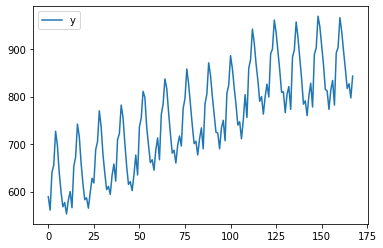

In [7]:
df.plot()

In [8]:
df['ds']=pd.to_datetime(df['ds'])

In [9]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


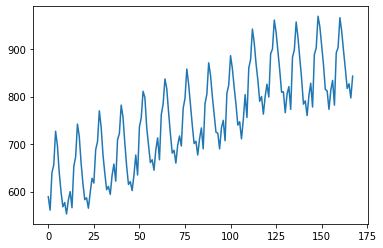

In [11]:
df['y'].plot()

In [12]:
from fbprophet import Prophet

In [13]:
model=Prophet()

In [14]:

### intiialize the Model
model=Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\nitya\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [15]:
model

In [16]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [17]:
future_dates=model.make_future_dataframe(periods=365)

In [18]:
df.tail()

,ds,y
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0
167,1975-12-01,843.0


In [19]:
prediction=model.predict(future_dates)

In [21]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.810747,576.947473,596.539797,606.810747,606.810747,-20.113596,-20.113596,-20.113596,-20.113596,-20.113596,-20.113596,0.0,0.0,0.0,586.697151
1,1962-02-01,608.536993,535.469886,556.416709,608.536993,608.536993,-62.537855,-62.537855,-62.537855,-62.537855,-62.537855,-62.537855,0.0,0.0,0.0,545.999137
2,1962-03-01,610.096182,632.065773,651.467554,610.096182,610.096182,31.410418,31.410418,31.410418,31.410418,31.410418,31.410418,0.0,0.0,0.0,641.506601
3,1962-04-01,611.822427,648.677560,668.511016,611.822427,611.822427,46.733066,46.733066,46.733066,46.733066,46.733066,46.733066,0.0,0.0,0.0,658.555494
4,1962-05-01,613.492987,711.495951,731.552483,613.492987,613.492987,108.064296,108.064296,108.064296,108.064296,108.064296,108.064296,0.0,0.0,0.0,721.557284


In [22]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,815.561801,804.260211,826.161762
529,1976-11-27,818.770979,807.251217,829.833015
530,1976-11-28,822.159021,811.385079,833.186964
531,1976-11-29,825.663235,814.773448,836.669394
532,1976-11-30,829.213819,817.149690,840.286770


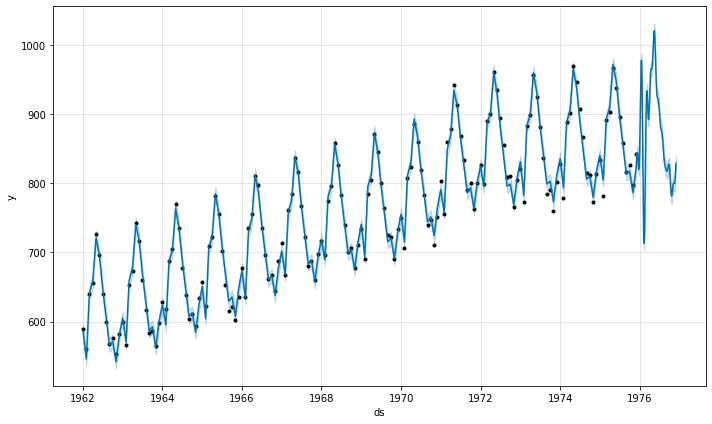

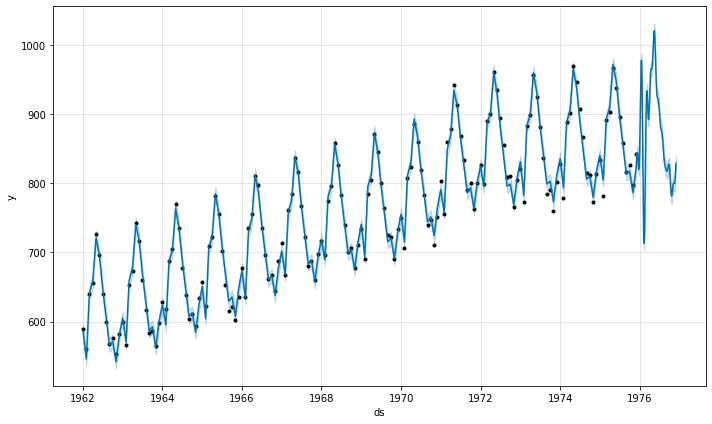

In [25]:
#### Plotting the Forecasts
model.plot(prediction)

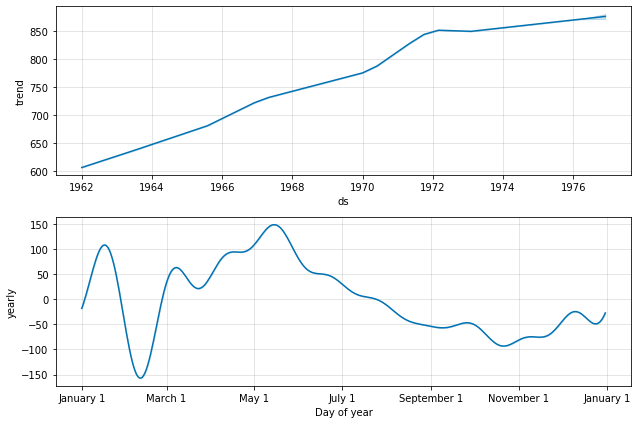

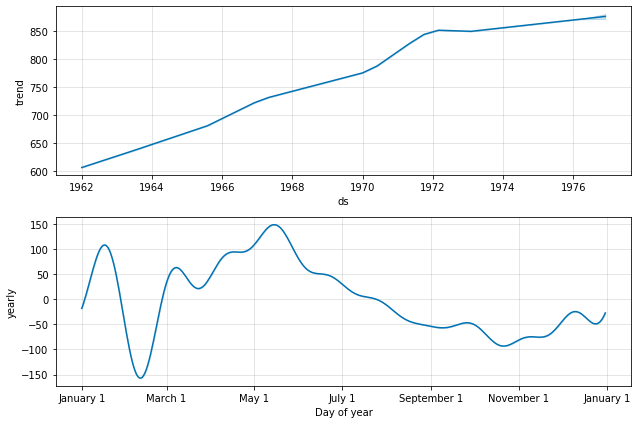

In [26]:
model.plot_components(prediction)

In [27]:
from fbprophet.diagnostics import cross_validation
df_cv=cross_validation(model,initial='730 days',period='180 days',horizon='365 days')
df_cv.head()

INFO:fbprophet:Making 23 forecasts with cutoffs between 1964-01-28 00:00:00 and 1974-12-01 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
C:\Users\nitya\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1964-02-01,583.977274,583.434917,584.492730,618.0,1964-01-28
1,1964-03-01,674.011237,672.125712,675.799558,688.0,1964-01-28
2,1964-04-01,699.688223,696.023301,703.467708,705.0,1964-01-28
3,1964-05-01,777.739078,771.751958,784.044395,770.0,1964-01-28
4,1964-06-01,736.303943,727.716319,745.742097,736.0,1964-01-28


In [28]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,278.995692,16.703164,12.858165,0.017109,0.013692,0.370370
1,38 days,236.641674,15.383162,11.736582,0.015265,0.012390,0.407407
2,41 days,239.442164,15.473919,11.885136,0.015459,0.013692,0.407407
3,42 days,255.048147,15.970227,12.460119,0.016218,0.014528,0.370370
4,43 days,255.763406,15.992605,12.585515,0.016416,0.014528,0.370370
